In [1]:
import numpy as np
import math
import os

Question 1a

In [2]:
def kmeans(X, iter=100):
    centroids = [[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]]
    
    for i in range(iter):
        # Assign each data point to the closest centroid
        cluster = []
        labels = []
        for j in range(5):
            cluster.append([])
        for p in X:
            dist = []
            for centroid in centroids:
                dist.append(math.sqrt((p[0] - centroid[0]) ** 2 + (p[1] - centroid[1]) ** 2))
            index = np.argmin(dist)
            #print(index)
            #print(dist)
            cluster[index].append(p)
            labels.append(index)
        
        # Move the centroids to the mean of their assigned data points
        for j in range(5):
            x = 0
            y = 0
            for p in cluster[j]:
                x += p[0]
                y += p[1]
            #print(x)
            #print(len(cluster[j]))
            #print(x/len(cluster[j]))
            centroids[j] = [x/len(cluster[j]), y/len(cluster[j])]
        #print(cluster)
        #print(centroids)
    return labels, centroids

In [3]:
# Load the data
data = np.loadtxt('./data/f150_motor_distributors.txt', delimiter=',')

In [4]:
data

array([[-11.96999577,  -8.03962819],
       [-26.96141582,  -6.96210943],
       [-12.91584891,  -1.37894148],
       ...,
       [ 12.92550271,  -0.10319682],
       [-34.33677838,   4.4057531 ],
       [-26.81273855,  -1.63995599]])

In [5]:
labels, centroids = kmeans(data)

In [6]:
centroids

[[27.266774030930158, -1.088484815183697],
 [-32.27032271684726, 2.6598414911912944],
 [-1.4540119217017722, -2.2393291816313843],
 [11.487377594398366, -1.7089834442426803],
 [-15.058957720669701, -0.4728141516667429]]

Q 1b

In [7]:
labels = np.array(labels)
centroids = np.array(centroids)

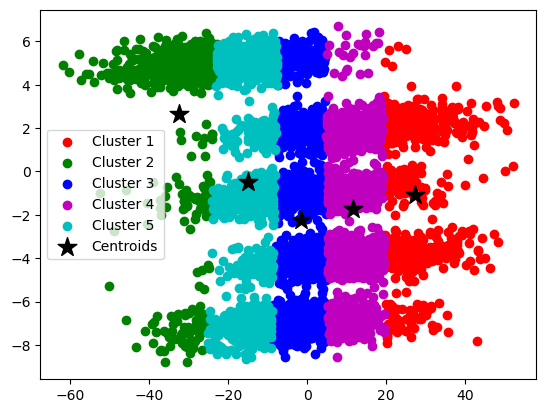

In [8]:
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'm', 'c']
for i in range(5):
    plt.scatter(data[labels==i, 0], data[labels==i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', marker='*', s=200, label='Centroids')
plt.legend()
plt.show()

Question 2a

In [9]:
P = np.array([[10, 0.5], [-10, 0.25]])
P_inv = np.linalg.inv(P)
inv = np.linalg.inv(P.T @ P)
def mahalanobis(x, y, inv):
    diff = x - y
    return np.sqrt(diff.T @ inv @ diff)

def kmeans_maha(X, iter=100):
    centroids = [[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]]
    
    for i in range(iter):
        # Assign each data point to the closest centroid
        cluster = []
        labels = []
        for j in range(5):
            cluster.append([])
        for p in X:
            dist = []
            for centroid in centroids:
                dist.append(mahalanobis(p, centroid, inv))
            index = np.argmin(dist)
            #print(index)
            #print(dist)
            cluster[index].append(p)
            labels.append(index)
        
        # Move the centroids to the mean of their assigned data points
        for j in range(5):
            x = 0
            y = 0
            for p in cluster[j]:
                x += p[0]
                y += p[1]
            #print(x)
            #print(len(cluster[j]))
            #print(x/len(cluster[j]))
            centroids[j] = [x/len(cluster[j]), y/len(cluster[j])]
        #print(cluster)
        #print(centroids)
    return labels, centroids

In [14]:
labels, centroids = kmeans_maha(data)

In [15]:
centroids

[[-20.403105985178254, 5.006552828071024],
 [-3.2476406616270768, -7.017664438065479],
 [-1.0967036871354454, -0.999203197592421],
 [9.974512853806498, 2.0020714807163493],
 [8.71408722184253, -4.009819469942165]]

In [18]:
labels

array([1, 1, 2, ..., 2, 0, 2])

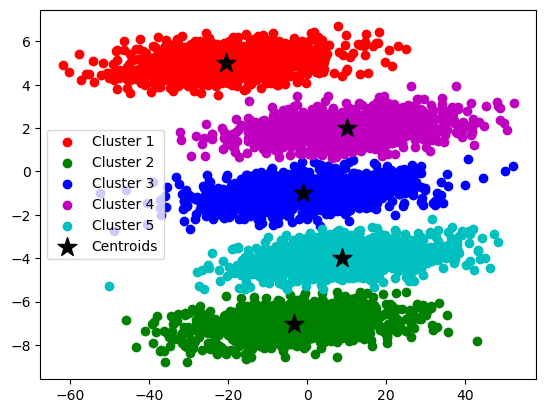

In [19]:
labels = np.array(labels)
centroids = np.array(centroids)
import matplotlib.pyplot as plt
colors = ['r', 'g', 'b', 'm', 'c']
for i in range(5):
    plt.scatter(data[labels==i, 0], data[labels==i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='k', marker='*', s=200, label='Centroids')
plt.legend()
plt.show()

Q 2b.

In [24]:
N = data.shape[0]
mean = np.mean(data, axis=0)
cov = (1 / (N - 1)) * np.dot((data - mean).T, data - mean)

In [26]:
cov

array([[321.52128167, -17.31559029],
       [-17.31559029,  18.37430687]])

In [27]:
eigvals, eigvecs = np.linalg.eig(cov)

In [28]:
sort_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sort_indices]
eigvecs = eigvecs[:, sort_indices]

print("Principal components:")
for i in range(eigvecs.shape[1]):
    print(f"PC{i+1}: {eigvecs[:,i]}")

Principal components:
PC1: [ 0.99838317 -0.05684225]
PC2: [0.05684225 0.99838317]


Q2c.

In [31]:
from sklearn.decomposition import PCA

# Compute PCA on each cluster
for i in range(5):
    cluster_data = data[labels == i]
    pca = PCA(n_components=2)
    pca.fit(cluster_data)
    print(f"Principal components for cluster {i + 1}:")
    print(pca.components_)

Principal components for cluster 1:
[[ 0.99993527  0.01137789]
 [ 0.01137789 -0.99993527]]
Principal components for cluster 2:
[[ 0.99992533  0.01222027]
 [ 0.01222027 -0.99992533]]
Principal components for cluster 3:
[[ 0.99990986  0.01342629]
 [ 0.01342629 -0.99990986]]
Principal components for cluster 4:
[[ 0.99993306  0.01157047]
 [-0.01157047  0.99993306]]
Principal components for cluster 5:
[[-0.99989374 -0.01457781]
 [-0.01457781  0.99989374]]


Q 2d.

In [33]:
eig_vals, eig_vecs = np.linalg.eig(P.T)
# sort eigenvectors in decreasing order of eigenvalues
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eig_vals = eig_vals[sorted_indices]
sorted_eig_vecs = eig_vecs[:,sorted_indices]

# create diagonal eigenvalue matrix
eig_val_matrix = np.diag(sorted_eig_vals)

# calculate new P'
P_prime = eig_val_matrix.dot(sorted_eig_vecs)

print(P_prime)

[[9.44301625 6.95724558]
 [0.04300577 0.53717161]]
